In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor, Lambda, Compose
from torchvision import datasets
import numpy as np
!pip install pytorch_model_summary
from pytorch_model_summary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Check device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Available device: {device}")

Available device: cuda


In [ ]:
# Create train and test_data loaders
train_data = torchvision.datasets.MNIST("./",train=True,download=True ,transform=ToTensor())
train_data_loaded = torch.utils.data.DataLoader(train_data,
                                          batch_size=32,
                                          shuffle=True)

# Creating Data Loader object for creating the Test set by using the field train=False 
test_data = torchvision.datasets.MNIST("./",train=False,download=True,transform=ToTensor())
test_data_loaded = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
# Specify training model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

In [ ]:
# Map model to device
model = Model()
model.to(torch.device(device))

Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu5): ReLU()
)

In [ ]:
# Specify loss functions
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0012)
epochs = 20

In [ ]:
# Train model
for epoch in range(epochs):                        # iterate over number of epochs
    running_loss = 0.0
    for i,images in enumerate(train_data_loaded):  # iterate over the batches of training data
        batch_images,batch_labels = images
        batch_images = batch_images.to(device)     
        batch_labels = batch_labels.to(device)
        optimizer.zero_grad()  
        outputs = model(batch_images)              # computing forward pass 
        loss = criterion(outputs, batch_labels)    # Calculating loss
        loss.backward()                            # Calculating the gradients
        optimizer.step()
        running_loss += loss.item()
        
        if i % 200 == 199: 
          print(f'[{epoch + 1}, {i + 1:5d}] loss : {running_loss / 2000:.3f}')
          running_loss = 0.0

[1,   200] loss : 0.284
[1,   400] loss : 0.171
[1,   600] loss : 0.161
[1,   800] loss : 0.155
[1,  1000] loss : 0.145
[1,  1200] loss : 0.132
[1,  1400] loss : 0.130
[1,  1600] loss : 0.128
[1,  1800] loss : 0.126
[2,   200] loss : 0.125
[2,   400] loss : 0.122
[2,   600] loss : 0.125
[2,   800] loss : 0.123
[2,  1000] loss : 0.125
[2,  1200] loss : 0.123
[2,  1400] loss : 0.121
[2,  1600] loss : 0.123
[2,  1800] loss : 0.121
[3,   200] loss : 0.121
[3,   400] loss : 0.122
[3,   600] loss : 0.120
[3,   800] loss : 0.124
[3,  1000] loss : 0.119
[3,  1200] loss : 0.123
[3,  1400] loss : 0.119
[3,  1600] loss : 0.119
[3,  1800] loss : 0.118
[4,   200] loss : 0.122
[4,   400] loss : 0.121
[4,   600] loss : 0.119
[4,   800] loss : 0.122
[4,  1000] loss : 0.119
[4,  1200] loss : 0.119
[4,  1400] loss : 0.119
[4,  1600] loss : 0.120
[4,  1800] loss : 0.119
[5,   200] loss : 0.117
[5,   400] loss : 0.117
[5,   600] loss : 0.119
[5,   800] loss : 0.121
[5,  1000] loss : 0.122
[5,  1200] loss 

In [ ]:
print(summary(Model(), torch.zeros((1, 1, 28, 28)), show_input=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Conv2d-1      [1, 1, 28, 28]             156             156
            ReLU-2      [1, 6, 24, 24]               0               0
       MaxPool2d-3      [1, 6, 24, 24]               0               0
          Conv2d-4      [1, 6, 12, 12]           2,416           2,416
            ReLU-5       [1, 16, 8, 8]               0               0
       MaxPool2d-6       [1, 16, 8, 8]               0               0
          Linear-7            [1, 256]          30,840          30,840
            ReLU-8            [1, 120]               0               0
          Linear-9            [1, 120]          10,164          10,164
           ReLU-10             [1, 84]               0               0
         Linear-11             [1, 84]             850             850
           ReLU-12             [1, 10]               0               0
Total

In [ ]:
# Save the trained model
torch.save(model.state_dict(), "lenetmnist.pth")
print('Model saved successfully')

Model saved successfully


In [ ]:
for layer, param in model.named_parameters():
    print(f"layer.name: {layer} & param.shape = {param.shape}")

layer.name: conv1.weight & param.shape = torch.Size([6, 1, 5, 5])
layer.name: conv1.bias & param.shape = torch.Size([6])
layer.name: conv2.weight & param.shape = torch.Size([16, 6, 5, 5])
layer.name: conv2.bias & param.shape = torch.Size([16])
layer.name: fc1.weight & param.shape = torch.Size([120, 256])
layer.name: fc1.bias & param.shape = torch.Size([120])
layer.name: fc2.weight & param.shape = torch.Size([84, 120])
layer.name: fc2.bias & param.shape = torch.Size([84])
layer.name: fc3.weight & param.shape = torch.Size([10, 84])
layer.name: fc3.bias & param.shape = torch.Size([10])


In [ ]:
import torch.nn.utils.prune as prune
import matplotlib.pyplot as plt
import time

In [ ]:
# Pruning function
def get_sparsity_accuracy(nmodel,test_data_loaded,device):
    
    """
       Calculating sum of all weights = 0 in the model.
    """
    global_sparsity = float(torch.sum(nmodel.conv1.weight == 0))        
    global_sparsity += float(torch.sum(nmodel.conv2.weight == 0))
    global_sparsity += float(torch.sum(nmodel.fc1.weight == 0))
    global_sparsity += float(torch.sum(nmodel.fc2.weight == 0))
    global_sparsity += float(torch.sum(nmodel.fc3.weight == 0))
    
    """
       Calculating total number of weights in the model.
    """
    total_no_of_weights = float(  nmodel.conv1.weight.nelement()
                                + nmodel.conv2.weight.nelement()
                                + nmodel.fc1.weight.nelement()
                                + nmodel.fc2.weight.nelement()
                                + nmodel.fc3.weight.nelement())
    """
       Calculating Sparsity =  (sum of all weights equal to 0) / (total number of weights in the model)
    """
    percent_sparsity = 100.0 * (global_sparsity/total_no_of_weights)
    print("Global sparsity: {:.2f}%".format(percent_sparsity))
    
    """
       Calculating the Accuracy of the pruned model on the Test set
    """
    
    num_correct = 0
    time_ = 0
    for i,images in enumerate(test_data_loaded):
        batch_images,batch_labels = images                           # iterate over the batches of training data
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)
        with torch.no_grad():
            start = time.time()
            outputs = nmodel(batch_images)                           # computing forward pass 
            end = time.time()
            num_correct += (batch_labels == outputs.max(dim=1)[1])   # Calculating total number of correct outputs 
            time_ += end - start
    accuracy = 100*num_correct.sum()/len(test_data_loaded.dataset)   # Accuracy = numbr of correct outputs / total test samples
    print("Accuracy: {:.2f}%".format(accuracy))
    return [percent_sparsity,round(float(accuracy),2),float(time_)/float(i)]

In [ ]:
##Percentage to prune
# Iitializing list of k values
k_list = [val/100 for val in [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]]

1)  Perform Weight Pruning to prune away k% neurons/units for k in  [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]

2)  Choose all layers other than the output layer and rank the weights using the absolute values
    by using the l1_unstructured function. 

3)  Calculate Sparsity in layers and the Accuracy of the Pruned model on the Test set.

In [ ]:
data = []

for k in k_list:
  nmodel = Model()
  nmodel.to(device)
  nmodel.load_state_dict(torch.load("lenetmnist.pth"))

  nmodel.eval()

    # Define the parameters/layers to be pruned-
  """
  parameters_to_prune = (
      (nmodel.conv1, 'weight'),
      (nmodel.conv2, 'weight'),
      (nmodel.fc1, 'weight'),
      (nmodel.fc2, 'weight'),
      (nmodel.fc3, 'weight')
  )
  """
  """
  prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=k )
  #prune.l1_unstructured(parameters_to_prune, amount=k)
  """
  """
  for name, module in nmodel.named_modules():
      if isinstance(module, torch.nn.Conv2d):
          prune.l1_unstructured(module, name="weight", amount=k)
      elif isinstance(module, torch.nn.Linear):
        prune.l1_unstructured(module, name="weight", amount=k)
  """
  for name, module in nmodel.named_modules():
    if name not in ["", "relu1", "pool1", "relu2", "pool2", "relu3", "relu4", "fc3", "relu5"]:
      prune.l1_unstructured(module, name='weight', amount=k)
  data.append(get_sparsity_accuracy(nmodel,test_data_loaded,device))

Global sparsity: 0.00%
Accuracy: 97.94%
Global sparsity: 24.53%
Accuracy: 97.96%
Global sparsity: 49.05%
Accuracy: 97.26%
Global sparsity: 58.86%
Accuracy: 95.76%
Global sparsity: 68.67%
Accuracy: 93.69%
Global sparsity: 78.48%
Accuracy: 90.00%
Global sparsity: 88.29%
Accuracy: 51.22%
Global sparsity: 93.19%
Accuracy: 22.62%
Global sparsity: 95.16%
Accuracy: 9.59%
Global sparsity: 97.12%
Accuracy: 10.28%


In [ ]:
# Plot sparsity/accuracy table
import pandas as pd
df = pd.DataFrame(data,columns=['% Sparsity', '% Accuracy',"Execution Time"])
print(df) 

   % Sparsity  % Accuracy  Execution Time
0    0.000000       97.94        0.060360
1   24.525911       97.96        0.000761
2   49.049559       97.26        0.000665
3   58.859470       95.76        0.000653
4   68.669382       93.69        0.000643
5   78.479294       90.00        0.000638
6   88.289206       51.22        0.000647
7   93.193030       22.62        0.000648
8   95.157275        9.59        0.000665
9   97.116995       10.28        0.000680


In [ ]:
print(data)

[[0.0, 97.94, 0.060360400363652394], [24.52591083955646, 97.96, 0.0007608635256988834], [49.049558723693146, 97.26, 0.0006649927659468217], [58.85947046843177, 95.76, 0.0006527997026539812], [68.66938221317041, 93.69, 0.0006432774091007734], [78.47929395790902, 90.0, 0.0006381068566832879], [88.28920570264765, 51.22, 0.0006473714655095881], [93.19303009730709, 22.62, 0.0006484359201758799], [95.1572754016746, 9.59, 0.0006653491896812362], [97.11699479520254, 10.28, 0.0006796085473262902]]


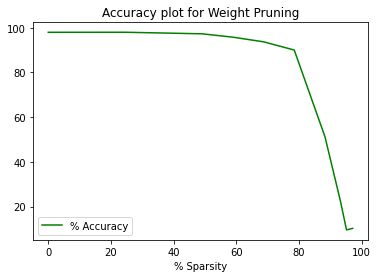

In [ ]:
# Plot accuracy plot for weight pruning
df.plot(kind='line', x = '% Sparsity', y='% Accuracy', color='green')
plt.title('Accuracy plot for Weight Pruning')
plt.show()

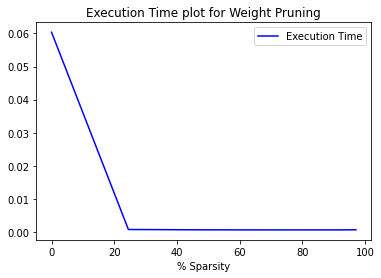

In [ ]:
df.plot(kind = 'line', x = '% Sparsity', y = "Execution Time", color = 'blue')
plt.title("Execution Time plot for Weight Pruning")
plt.show()

In [ ]:
torch.save(nmodel.state_dict(), "pruned_lenet5_mnist.pth")
print('Model saved successfully')

Model saved successfully
